In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [ ]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

# Just import these 2 modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the classification model

In [ ]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [14]:
model = YOLO('models/yolov8n-cls.pt') 

In [15]:
target_layers =[model.model.model[-2]]

### You may get an innaccurate output at first


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 4.0ms
Speed: 617.9ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


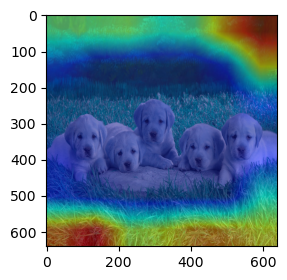

In [16]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

### SImply Re-running the cell will do the trick


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 4.4ms
Speed: 1.3ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


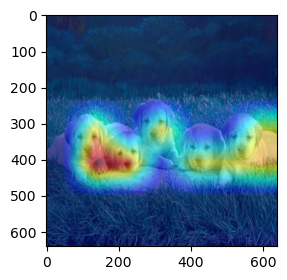

In [17]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

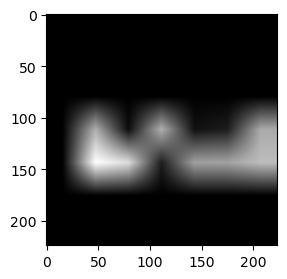

In [18]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

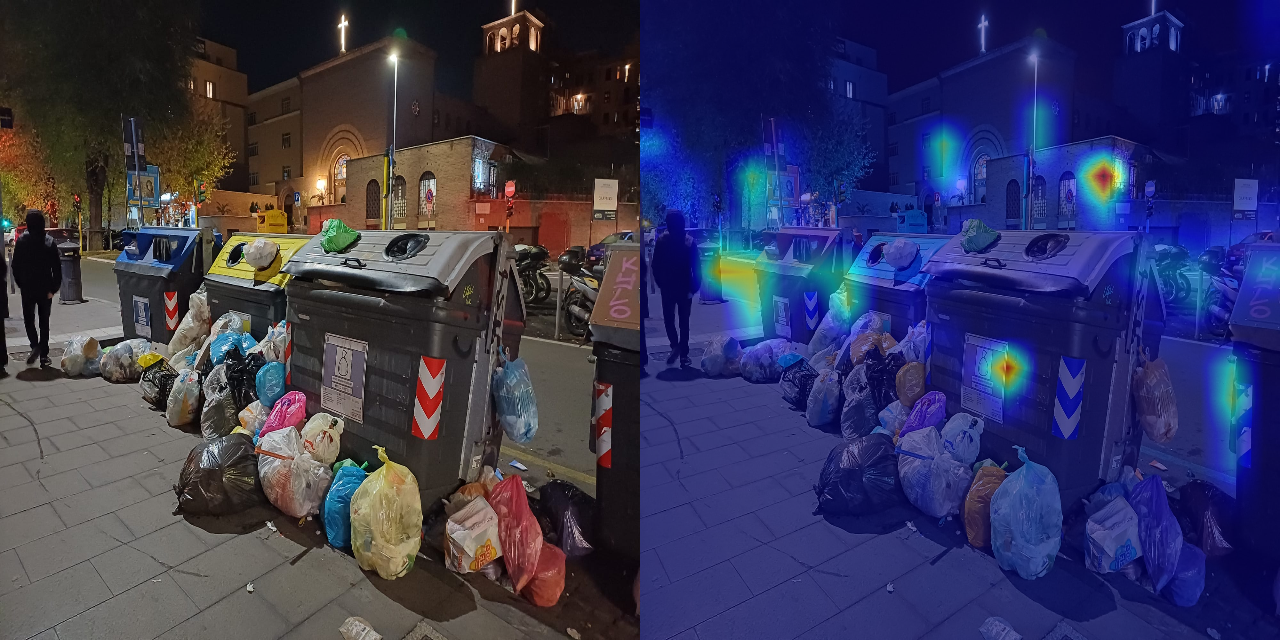

In [94]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

# For the object detection model

In [105]:
from ultralytics.nn.tasks import DetectionModel

det = DetectionModel("model.yaml")
det.load(torch.load("weights/yolov8_ep_90_best.pt"))


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [106]:
model = YOLO(model="weights/yolov8_ep_90_best.pt", task="detect")  # load a pretrained model (recommended for training)
model.model = det

In [112]:
img_test_path = 'own-test-images/train_img_for_test.jpg'
img = cv2.imread(img_test_path)
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [113]:
target_layers = [model.model.model[-4]]


0: 640x640 1 0, 2655.0ms
Speed: 213.0ms preprocess, 2655.0ms inference, 74.0ms postprocess per image at shape (1, 3, 640, 640)


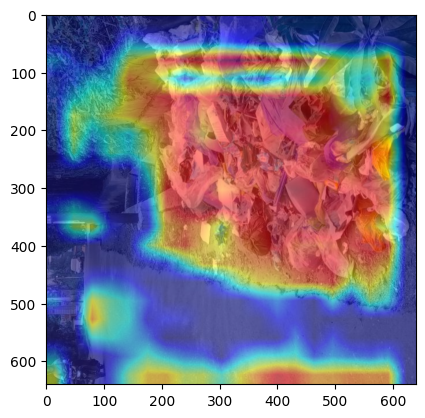

In [114]:
cam = EigenCAM(model, target_layers, task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


image 1/1 C:\Users\Jonas\Desktop\Uni\MSc\Year-2\AML\Assignments\final-project\YOLO-V8-CAM\own-test-images\train_img_for_test.jpg: 640x640 1 0, 586.0ms
Speed: 8.0ms preprocess, 586.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


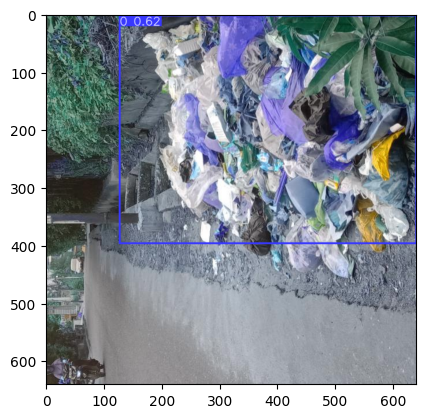

In [115]:
prediction = model(img_test_path)[0]
plt.imshow(prediction.plot())
plt.show()


image 1/1 C:\Users\Jonas\Desktop\Uni\MSc\Year-2\AML\Assignments\final-project\YOLO-V8-CAM\own-test-images\test_img_2.jpeg: 480x640 1 0, 1651.9ms
Speed: 60.1ms preprocess, 1651.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


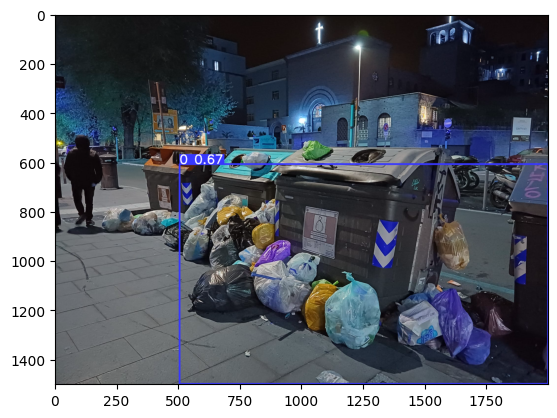

In [110]:
prediction = model(img_test_path)[0]
plt.imshow(prediction.plot())
plt.show()

In [101]:
prediction

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '0'}
orig_img: array([[[24, 26, 27],
        [25, 27, 28],
        [26, 28, 29],
        ...,
        [25, 16, 13],
        [28, 16, 14],
        [29, 17, 15]],

       [[25, 27, 28],
        [25, 27, 28],
        [26, 28, 29],
        ...,
        [25, 16, 13],
        [28, 16, 14],
        [29, 17, 15]],

       [[26, 28, 29],
        [26, 28, 29],
        [27, 29, 30],
        ...,
        [24, 15, 12],
        [28, 16, 14],
        [29, 17, 15]],

       ...,

       [[90, 93, 97],
        [89, 92, 96],
        [87, 90, 94],
        ...,
        [31, 28, 44],
        [29, 26, 42],
        [27, 24, 40]],

       [[90, 93, 97],
        [89, 92, 96],
        [87, 90, 94],
        ...,
        [30, 27, 43],
        [29, 26, 42],
        [28, 25, 41]],

       [[90, 93, 97],
        [89, 92, 96],
        [87, 90, 94],
        ...,
        [30,

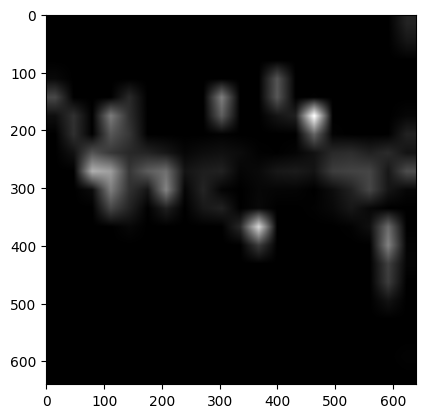

In [102]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

In [117]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
#Image.fromarray(np.hstack((im, prediction.plot(), cam_image)))

(-0.5, 639.5, 639.5, -0.5)

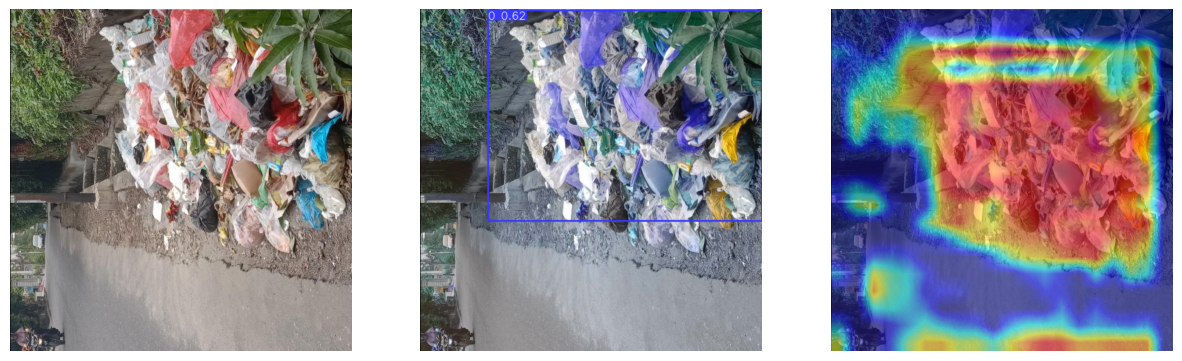

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
ax[0].axis("off")
ax[0].imshow(im)
ax[1].imshow(prediction.plot())
ax[1].axis("off")
ax[2].imshow(cam_image)
ax[2].axis("off")